# Stable Matching
Here, we're covering the classic Gale-Shapley algorithm here. We will then cover the __probabilistic analysis__ of this alg.

__Fact__: This is a Nobel prize winning alg. in economics.

## Problem
We introduce the problem of stable matching. Let say we have $n$ colleges and $m$ students applying. Each college has a list of preference/ ranking of students and each student also has a preference list for colleges. For simplicity, let say $m=n$. The problem is to match each college with one student such that the resulting configuration is __stable__. 

Stability is defined as no switching would be possible. In a unstable matching, Alice is matched to UMass and Bob is matched to Cornell (picture!). However, Alice prefers Cornell and Cornell prefers Alice. This creates unstability since switching is possible. In marriage arrangement version of stable matching, a man covets thy neighbor's wife and the wife also likes the man better than her husband. This creates opportunity for cheating!  (yeah, it's very dark)

Note that a scenario where Alice prefers Cornell and Bob prefers UMass is not necessarily unstable since there's nothing Alice and Bob can do. Maybe, UMass likes Alice a lot and Cornell likes Bob a lot so the students' preference don't really matter. This is the scenario where two men covet each other's wives but there're nothing they can do if the wives are not onboard. 

We aim to create a __stable matching__. This matching might not make everyone happy! A stable matching is not an optimal or happy ending by any means. For example, if every student prefers UMass but UMass only has the capacity to admit 1 student, of course there's no matching that will make everyone totally happy. We opt for a stable matching since
* It's mathematically well-defined and thus probably doable.
* It sorta makes sense from a physical perspective for the system to reach a stable configuration. Although each cog in the machine might not very happy, it's nothing they can really do. (think of Karl Marx stuff about worker exploitation).

## Solution

Before presenting the alg, note that it's not very clear that given two preference lists, there exists a stable matching in the first place. The remarkable thing about Gale-Shapley is that by explicitly finding a stable matching solution, it indirectly proves the existence of a stable matching. In our scheme, the alg. would strictly favor colleges over students (more on this later). 

        while some students, s, are still unmatched:
            s applies to his most desirable college c that he has not been rejected from.
            If c has no student, then c admits s.
            Else if c has student s' then c only admits s if c prefers s to their current
            student s'.

__Termination__:

We argue that the alg. must terminate. Note that once a college has a student, it will always have a student (it only exchange bad student for better student but never lose student). So since there're $n$ students and $n$ colleges, the alg. terminates whenever all colleges are matched. A college must lie somewhere in the preference list of each student. So if there's unmatched student, eventually each college must be applied to. So, the alg. terminates. Moreover, the alg. terminates in $O(n^2)$ round. Note that each student can only apply to college that he hasn't been rejected from. There're $n$ students and $n$ colleges so there are $n^2$ possible applications! (an application is a student-college pair)  No application is repeated so it must terminates in $O(n^2)$. 

__Stability__:

We'll show that the final config is stable. For contradiction, let say it's not so that we have the Alice-UMass, Bob-Cornell situation. Say Alice likes Cornell better than UMass and Cornell likes Alice better than Bob. Now, the optimality for colleges comes into play. Note that colleges are never worse off each round. The only reason, a college replaces its admitted student is that the colleges finds a better student (in its eyes) to the current student. Now, if Alice prefers Cornell, then in the alg. Alice must apply to Cornell before UMass. But Cornell doesn't have Alice in their class at the end. This means that whoever is in Cornell's class, he must be better than Alice (in Cornell's opinion). So Cornell must prefer Bob to Alice. There's no instability! Contradiction!

## Probabilistic Analysis

We know that the runtime of Gale-Shapley is $O(n^2)$. But what's the expected runtime if we assume that the preference lists are random?

Specifically, assume that the students' preference lists are randomly and uniformly generated. Then, similar to clock solataire, we'll consider the randomness as it unfolds through the run of the alg.

Consider this __amnesiac alg__: at each turn, the unmatched student randomly proposes to _any_ of the $n$ colleges. Note that the runtime of this alg. will be longer than our Gale-Shapley alg. since Gale-Shapley only proposes to colleges that have yet reject you. But this alg. still works since if Cornell rejects you in the past, they'll reject you again. (Colleges always trade up). 

One run of this amnesiac alg. can go as follows.

![title](Figures/prob_gale.jpeg)

The alg. terminates as long as all three colleges have been applied to at least once. Since once a college gets applied to, it gets matched and we have said that colleges can never be unmatched. So once $n$ colleges are applied to, the alg. terminates. This turns into the coupon collection problem (the one with cereal box and soccer cards). In every turn of the alg, an unmatched student randomly apply to one of the colleges and we're waiting for the moment where all $n$ colleges have been applied to. So we're collecting colleges as soccer cards essentially. The runtime for coupon collection is $nH_n$ so that's the upper-bound for Gale-Shapley alg.

## Who benefits?

https://www.cs.princeton.edu/~wayne/kleinberg-tardos/pdf/01StableMatching.pdf

See Kleinberg book Chapter 1.


__Claim 1: Gale-Shapley is student-optimal__

Define a _valid college_ of a student is a college-student matching such that there exists a stable matching that support this. 

__Claim 2: Colleges are strictly worse-off__

This is rather surprising considering the fact that it seems like colleges are getting better and better students. They only "trade up". 



The side that does the proposing actually ends up on top.

## Code

In [186]:
import numpy as np
np.random.seed(1)

In [187]:
N = 10 # number of colleges and number of students

def random_pref(N):
    A = np.array([np.random.permutation(N) for _ in range(N)])
    return A.reshape(N, N)

s_prefs = random_pref(N) # student preference
c_prefs = random_pref(N) # college preference
print(s_prefs)
print('====')
print(c_prefs)

[[2 9 6 4 0 3 1 7 8 5]
 [9 5 3 0 8 4 2 1 6 7]
 [8 3 5 9 0 6 1 7 4 2]
 [2 4 3 0 6 1 5 8 7 9]
 [6 4 7 0 1 2 3 5 9 8]
 [2 7 4 0 9 8 1 5 6 3]
 [7 9 8 6 2 1 3 5 0 4]
 [4 3 5 6 0 1 8 7 2 9]
 [6 0 2 8 1 3 4 5 9 7]
 [6 9 5 7 4 3 1 8 2 0]]
====
[[2 5 4 9 3 6 1 7 8 0]
 [0 7 1 3 8 2 9 5 4 6]
 [5 1 0 2 6 9 4 3 8 7]
 [5 3 9 6 2 8 0 1 4 7]
 [6 4 3 5 2 0 8 9 1 7]
 [4 5 6 0 7 9 3 2 8 1]
 [8 4 7 3 5 9 1 0 6 2]
 [9 3 6 7 8 0 4 2 1 5]
 [2 3 6 9 1 8 5 7 0 4]
 [0 8 2 9 7 4 5 6 1 3]]


In [188]:
# index in array A
def index(A, e):
    i = np.where(A == e)[0]
    if i.size == 0:
        return None
    return i[0]
    
def apply_to(s, c, s_prefs, matching):
    print('s[', s, ']==> c[', c, ']')
    # change the matching internally. Return 
    # True if accept and False if reject
    accept = True
    cur_s = index(matching, c) # find the current student matched to college c
    if cur_s == None or index(c_prefs[c], cur_s) > index(c_prefs[c], s): # no student yet or
        print('\t >> accept')
        # c prefers s to cur ==> Match
        matching[s] = c
        # rescinding the offer!
        if cur_s != None:
            matching[cur_s] = -1
        return accept
    accept = False
    print('\t >> reject')
    return accept

def print_matching(matching):
    s = ""
    for i, e in enumerate(matching):
        prop = ""
        if e != -1:
            prop = "c[" + str(e) + "]"
        s += " s[" + str(i) + "]==>" + prop + " | "
    return s
        
def Gale_Shapley(s_prefs, c_prefs):
    print('s_prefs: \n', s_prefs)
    print('c_prefs:\n', c_prefs)
    print('====================')
    # app_records keeps track for each student, what's their top-choice college that
    # they have not apply to.
    app_records = np.zeros(N, dtype=int) # initially, they're free to apply to the top of 
    # their list
    matching = np.full(N, -1) # initialize
    num_runs = 0
    while True:
        print('\n matching', print_matching(matching))
        num_runs += 1
        unmatched = index(matching, -1) 
        if unmatched == None:
            print("Done after", num_runs, "rounds!")
            return matching
        s = unmatched
        # top-choice college
        c = s_prefs[s][app_records[s]]
        accept = apply_to(s, c, s_prefs, matching)
        app_records[s] +=1 # won't apply to this college again! 

In [189]:
matching = Gale_Shapley(s_prefs, c_prefs)
print('Final matching: ', matching)

s_prefs: 
 [[2 9 6 4 0 3 1 7 8 5]
 [9 5 3 0 8 4 2 1 6 7]
 [8 3 5 9 0 6 1 7 4 2]
 [2 4 3 0 6 1 5 8 7 9]
 [6 4 7 0 1 2 3 5 9 8]
 [2 7 4 0 9 8 1 5 6 3]
 [7 9 8 6 2 1 3 5 0 4]
 [4 3 5 6 0 1 8 7 2 9]
 [6 0 2 8 1 3 4 5 9 7]
 [6 9 5 7 4 3 1 8 2 0]]
c_prefs:
 [[2 5 4 9 3 6 1 7 8 0]
 [0 7 1 3 8 2 9 5 4 6]
 [5 1 0 2 6 9 4 3 8 7]
 [5 3 9 6 2 8 0 1 4 7]
 [6 4 3 5 2 0 8 9 1 7]
 [4 5 6 0 7 9 3 2 8 1]
 [8 4 7 3 5 9 1 0 6 2]
 [9 3 6 7 8 0 4 2 1 5]
 [2 3 6 9 1 8 5 7 0 4]
 [0 8 2 9 7 4 5 6 1 3]]

 matching  s[0]==> |  s[1]==> |  s[2]==> |  s[3]==> |  s[4]==> |  s[5]==> |  s[6]==> |  s[7]==> |  s[8]==> |  s[9]==> | 
s[ 0 ]==> c[ 2 ]
	 >> accept

 matching  s[0]==>c[2] |  s[1]==> |  s[2]==> |  s[3]==> |  s[4]==> |  s[5]==> |  s[6]==> |  s[7]==> |  s[8]==> |  s[9]==> | 
s[ 1 ]==> c[ 9 ]
	 >> accept

 matching  s[0]==>c[2] |  s[1]==>c[9] |  s[2]==> |  s[3]==> |  s[4]==> |  s[5]==> |  s[6]==> |  s[7]==> |  s[8]==> |  s[9]==> | 
s[ 2 ]==> c[ 8 ]
	 >> accept

 matching  s[0]==>c[2] |  s[1]==>c[9] |  s[2]==>c[8

In [190]:
def Hn(n):
    # Harmonic number: H_n = 1 + 1/2 + ... + 1/n
    return sum([1/i for i in range(1, n+1)])

print('upper-bound for random pref list Gale-Shapley is n * H_n = ', N * Hn(N))

upper-bound for random pref list Gale-Shapley is n * H_n =  29.289682539682538


In [191]:
'''
TODO:
https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.bipartite_layout.html
Somehow visualize this?
'''

'\nTODO:\nhttps://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.bipartite_layout.html\nSomehow visualize this?\n'

# Max SAT
We are given m clauses in n Boolean variables. Like
$$x_1 \lor x_2, \neg x_1 \lor x_3, ..., x_4, x_5 \lor x_4 \lor \neg x_6$$
We want to find some assignment to maximize the number of clauses satisfied. 

## Simple 1/2 approximation
We simply set each variable to True/False randomly with prob. 1/2. Let $Z_i$ be Bernoulli r.v. that ith clause is satisfied. Say the ith clause has k variables. Because a clause is a OR statement, ith clause is only _not_ satisfied with one specific configuration out of $2^k$ possible ways to set the variables in $k$. For example, if ith clause is $x_1 \lor x_2 \lor \neg x_3$ then only FFT doesn't work. So the prob. of satisfying is
$$E(Z_i) = 1 - \frac{1}{2^k}.$$
Now, come the amazing thing! Although $Z_i, Z_j$ are not independent since they might share some variables, linearity of expectation doesn't care.
$$E(\textrm{number of satisfied clause}) = \sum_{i=1}^m E(Z_i) = \sum_{i=1}^m 1 - \frac{1}{2^{k_i}} \geq \frac{m}{2}.$$

So this is a $1/2$ approximation since the max number of clauses that we can potentially satisfy is at most $m$. 

## Linear Program
It's easy to turn this into an optimization problem. Let $x_i \in \{0, 1\}$ be the truth variables and $z_j \in \{0, 1\}$ be the indicator that clause jth is satisfied. Given a specific formula, like
$$x_1 \lor x_2, \neg x_1 \lor x_3, ..., x_4, x_5 \lor x_4 \lor \neg x_6$$
we can preprocess the data to find out $C^{+}_j$, which is the index set including the variables for the jth clause. And $C^{-}_j$ is all the negated variables involving in the jth clause. For example, for the clause $x_1 \lor x_2$, $C^+ = \{1, 2\}$ and $C^- = \emptyset$. For $x_5 \lor x_4 \lor \neg x_6$, $C^+ = \{5, 4\}$, $C^- = \{6\}$. Then, we want to maximize the number of clauses satisfied

$$\max \sum_{j=1}^m z_j$$

subject to some constraint about what it means for jth clause to be satisfied. If $z_j = 0$ (not satisfied), then the variables involved in jth can be whatever. If $z_j = 1$, then we need at least one variable to be $1$ so the sum should be at least $z_j=1$. That is the constraint is
$$\sum_{i \in C^+_j} x_i + \sum_{i \in C^-_j} (1- x_i) \geq z_j$$
for all $j \in [m]$. This is a linear program. See CS 590OP. 

The restriction $x_i, z_i \in \{0, 1\}$ to be discrete is very annoying. It makes continuous calculus/optimization impossible so we'll back to bruteforcingly search all the $2^n$ combinations. 



### Relaxation
We can relax this way: $x_i, z_i \in [0, 1]$. Now, we can obtain solutions $x_i, z_i$ by linear program solver. Let $\hat{x_i}, \hat{z_i}$ be the relaxed solutions. Let $\hat{f} = \sum_j \hat{z_j}$ be the objective of the relaxed program. Let $f^*$ be the solution to the discrete program (the max SAT problem). Note that the relaxed solution must be no less optimal than the discrete solution i.e. $\hat{f} \geq f^*$. This is because the relaxed program includes a broader class of solutions and should include the discrete solution as well. (i.e. If $x_i \in \{0, 1\}$ discrete then of course $x_i \in [0, 1]$ so a discrete solution is also a relaxed solution but not necessarily the other way around). 

So now, the only problem remaining is to convert the relaxed solution to discrete one since for example, $\hat{x_1} = 0.6$ is not a valid Boolean for MAX-SAT. We need to do rounding somehow... 

### Solution
__Failed attempt__: 

Let just round $\hat{x_i}$ to $1$ if $\hat{x_i} \geq 0.5$ and down to $0$ otherwise. Unfortunately, this doesn't work. 

For example, consider two clauses, $x_1 \lor x_2 \lor x_3$, $x_4 \lor x_5 \lor x_6$. An optimal relaxed solution is to set each $x_i = 0.4$ then their sum is $1.2$ so $z_i = 1$ or all of the clauses are satisfied. But in the discrete case, they're rounded down to $0$ so none of the clauses are satisfied.

__Randomized rounding__

Let try randomized rounding as before. This time, we round $\hat{x_i}$ to 1 with probability $\hat{x_i}$. So if $\hat{x_i}=0.8$ there's high probability of rounding up and $\hat{x_i}=0.2$ there's high prob. of rounding down.

As before, we'll analyze the prob. of each clause being satisfied and take the advantage of the constraints satisfied by the relaxed program. Let $Z_i$ be the Bernoulli indicator that clause jth is satisfied in the rounding scheme. So if jth clause is $x_1 \lor x_2 \lor \neg x_3$, the only unsatisfied config is FFT. 

$$Pr(\textrm{jth not sat}) = Pr(Z_j = 0) = \prod_{C^+_j} (1-\hat{x_i}) \prod_{C^-_j} \hat{x_i}$$

We want this failure prob. to be small. Also, note the important constraint: $\sum_{C^+_j} \hat{x_i} + \sum_{C^-_j} (1- \hat{x_i}) \geq \hat{z_j}$. We'll use the AM-GM inequality to convert a product (geometric mean) into a sum (arithmetic mean). Per Andrew McGregor's tip, the way to remember which way the inequality goes is to take $a_1 = 1$ and everything else 0 then the product is 0 but the sum is not 0 so sum is larger.

$$\prod_{C^+_j} (1-\hat{x_i}) \prod_{C^-_j} \hat{x_i} \leq \bigg (\frac{\sum_{C^+_j} (1-\hat{x_i}) +  \sum_{C^-_j} \hat{x_i}}{k} \bigg)^k $$

where $k$ is the number of variables in clause $jth$ i.e. $k=|C_j^+| + |C_j^-|$. Then,

$$\sum_{C^+_j} (1-\hat{x_i}) +  \sum_{C^-_j} \hat{x_i} = k - (  \sum_{C^+_j} \hat{x_i} + \sum_{C^-_j} (1- \hat{x_i})) \leq k - \hat{z}_j.$$

So
$$Pr(Z_j = 0) \leq \bigg ( 1 - \frac{\hat{z}_j}{k} \bigg)^k$$

But this expression is still a bit nasty. Ideally, we want $\hat{z_j}$ to be multiplied by something so when summing up $\hat{z_j}$, we get back the relaxed objective. The cool trick is to see $f(z) = (1-\frac{z}{k})^k$ as a convex function of $z$ with fixed $k$. 

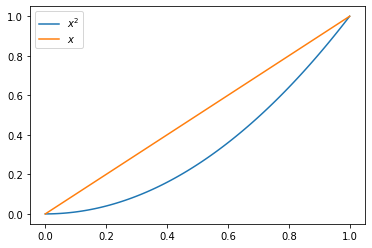

In [200]:
## Convex function: function that curves upward. 
## Prototypical example: f(x) = x^2. This function would always stay below the linear interpolation line


# linear interpolation of x^2 at x=0 and x=1 is the line y=x.
# Note that x^2 always stay below the linear line
x = np.linspace(0, 1, 100)
convex = x**2
import matplotlib.pyplot as plt
plt.plot(x, convex, label='$x^2$')
plt.plot(x, x, label='$x$')
plt.legend()

In [239]:
# https://www.youtube.com/watch?v=rkBPgTL-D3Y
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual 

def graph(k):
    f = (1-x/k)**k
    ## interpolation line
    # f(0)= a = 1, f(1)= b = (1-1/k)**k
    # y = (b-a)x + a = 1 + ((1-1/k)^k - 1)x
    linear = 1 + ((1-1/k)**k - 1)*x
    plt.plot(x, f, label='f')
    plt.plot(x, linear, label='linear')
    plt.legend()

interact(graph, k=(1, 20))

interactive(children=(IntSlider(value=10, description='k', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.graph(k)>

Thus, we have
$$Pr(Z_j=0) \leq 1 + \bigg ( \bigg(1 - \frac{1}{k} \bigg)^k - 1 \bigg)\hat{z_j}$$

Thus, now we have
$$Pr(Z_j=1) \geq \bigg ( 1-\bigg(1 - \frac{1}{k} \bigg)^k\bigg)\hat{z_j}$$
$$E(\textrm{Num. sat. claused by rounding}) \geq \sum_j \bigg ( 1- \bigg(1 - \frac{1}{k} \bigg)^k \bigg)\hat{z_j}$$
$$= \bigg ( 1- \bigg(1 - \frac{1}{k} \bigg)^k \bigg) \hat{f} \geq \bigg (1 - \frac{1}{e} \bigg ) \hat{f}$$

Note the Bernoulli's formula for Euler number
$$\bigg (1 + \frac{a}{n} \bigg)^n = e^a$$
as $n \to \infty$. 

In [256]:
# very good approximation! Can retain about 60% of the optimal
# objective value
1 - 1/(np.e)

0.6321205588285577

[]

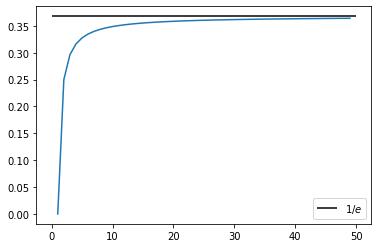

In [257]:
n = 50
k = np.arange(1, n, 1) # 1, ..., 29
# linear program
lp = (1-1/k)**k 
plt.plot(k, lp)
plt.hlines(1/(np.e), xmin=0, xmax=n, label='$1/e$')
plt.legend()
plt.plot()

Indeed, $(1-1/k)^k$ approaches $1/e$ from below. 

Now, note that for the simple 1/2 approximation, we have the factor $1-\frac{1}{2^k}$ as $k$ very large, this factor is close to 1, which is good. Here, we have the factor, $ 1- \bigg(1 - \frac{1}{k} \bigg)^k$, which gets bad as $k$ is large. 

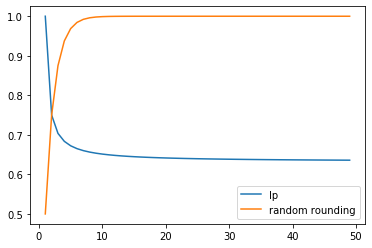

In [259]:
random_rounding = 1-1/(2**k)
lp = (1-(1-1/k)**k)
plt.plot(k, lp, label='lp')
plt.plot(k, random_rounding, label='random rounding')
plt.legend()
plt.show()

* LP is good if $k$ small  
* Random rounding is good $k$ large

## 3/4 approximation

Thus, a hybrid alg. is to run both LP and random rounding and pick the best result out of the two. We'll show that this alg. returns 3/4 approximation (which is 0.75 retention). 

Let $A$ be the number of clauses satisfied by the random rounding alg. and $B$ be the num. of clauses satisfied by the rounding with linear program. Then, we're interested in $E(max(A, B))$ the hybrid alg.

Note that
$$E(max(A, B)) \geq \frac{1}{2}(E(A) + E(B))$$

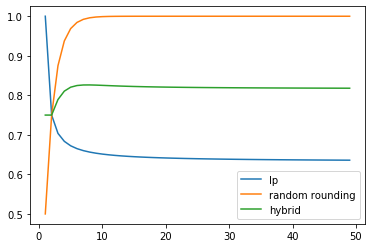

In [261]:
plt.plot(k, lp, label='lp')
plt.plot(k, random_rounding, label='random rounding')
plt.plot(k, 0.5 * (lp + random_rounding), label='hybrid')
plt.legend()
plt.show()

# Wiring Problem

See McGregor's slide and Motwani, Raghavan book.

# Puzzle: Von Neuman's Coin

If we're given a biased coin (head with probability $p=0.7$ say), how could we simulate an unbiased coin?

One approach is might be toss the coin a bunch of times and use MLE or MAP estimate to approximate $p$ and work from there.

But we don't need to know $p$. The idea is to seek two distinguishable and equally likely events that we can get with a biased coin, say event $A$ and $B$. Then, we can associate Head with $A$ and Tail with $B$. We keep on tossing the coin until we observe either A or B. Since A and B are equally likely, we have effectively created a biased coin.

Let toss the unbiased coin twice. All the possible sequences are HH, TT, HT and TH. Note that HT and TH are equally likely since two tosses are independent. Then, we can associate H with HT and T with TH. The alg. to simulate a unbiased coin becomes.

        Toss two times from the biased coin.
            If HT, return H
            If TH, return T
            Else, repeat